In [1]:
import retro
import matplotlib.pyplot as plt
import numpy as np
import scipy.misc

%matplotlib inline
env = None

In [2]:
if env is None:
    env = retro.make(game='SonicTheHedgehog-Genesis', state='GreenHillZone.Act1', record='.')
_ = env.reset()

In [3]:
for i in range( 10 ):
    env.step( env.action_space.sample() )
frame, reward, done, info = env.step( env.action_space.sample() )
FRAME_SHAPE = frame.shape

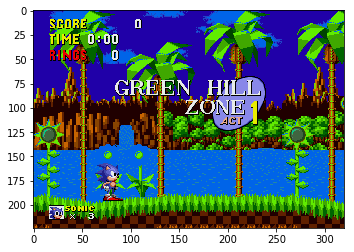

In [4]:
def imageTo8BitColor( image ):
    assert image.shape[ -1 ] == 3 or image.shape[ -1 ] == 4
    
    output_image = np.zeros( image.shape[ 0 : 2 ], dtype=np.uint8 )

    output_image[ :, : ]  = ( image[ :, :, 0 ] / 32 ).astype( np.uint8 ) * 32 # << 4
    output_image[ :, : ] += ( image[ :, :, 1 ] / 32 ).astype( np.uint8 ) * 4  # << 2 
    output_image[ :, : ] += ( image[ :, :, 2 ] / 64 ).astype( np.uint8 )
    
    alpha = None
    if image.shape[ -1 ] == 4:
        alpha = image[ :, :, 3 ]

    return output_image, alpha
plt.imshow( frame )

frame = imageTo8BitColor( frame )[ 0 ]

{'level_end_bonus': 0, 'rings': 0, 'score': 0, 'zone': 0, 'act': 0, 'screen_x_end': 9407, 'screen_y': 768, 'lives': 3, 'x': 80, 'y': 944, 'screen_x': 0}


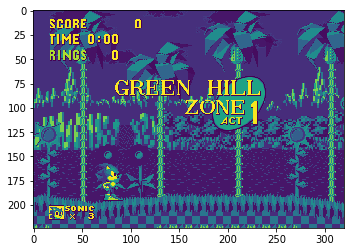

In [5]:
plt.imshow( frame )
print( info )

/home/mike/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.
/home/mike/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


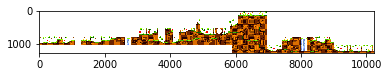

In [8]:
foreground = scipy.misc.imread( 'data/Green Hill Zone Act 1/foreground.png', mode='RGBA' )
foreground_col1 = scipy.misc.imread( 'data/Green Hill Zone Act 1/foreground_col1.png', mode='RGBA' )
plt.imshow( foreground )

def clipToInfo( _image, _info ):
    return _image[ _info[ 'screen_y' ]:_info[ 'screen_y' ] + FRAME_SHAPE[ 0 ], _info[ 'screen_x' ]:_info[ 'screen_x' ] + FRAME_SHAPE[ 1 ] ]

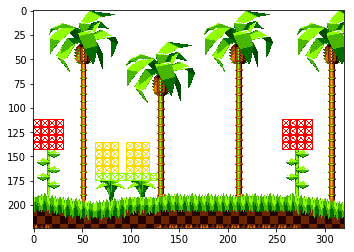

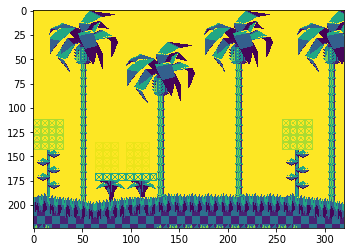

In [9]:
clipped_foreground = clipToInfo( foreground, info )
plt.imshow( clipped_foreground )
plt.subplots()

clipped_foreground = imageTo8BitColor( clipped_foreground )[ 0 ]

plt.imshow( clipped_foreground )

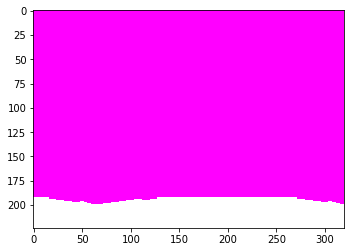

In [10]:
clipped_foreground_col1 = clipToInfo( foreground_col1, info )
plt.imshow( clipped_foreground_col1 )

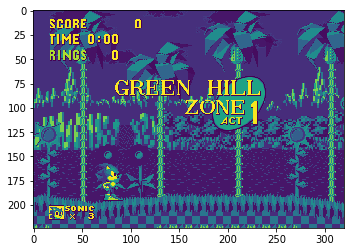

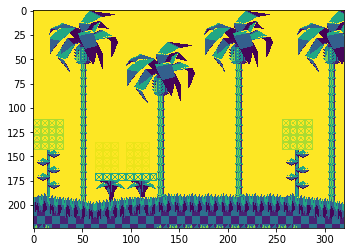

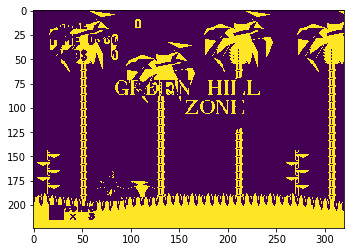

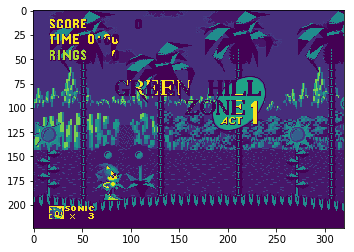

In [11]:
frame_copy = frame.copy()
plt.imshow( frame_copy )
plt.subplots()

plt.imshow( clipped_foreground[ :, : ] )
plt.subplots()

plt.imshow( frame_copy[ :, : ] == clipped_foreground[ :, : ] )
plt.subplots()

frame_copy[ frame_copy[ :, : ] == clipped_foreground[ :, : ] ] = 0

plt.imshow( frame_copy )